In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.08517476 0.29281588 0.08386519 ... 0.18055201 0.15128287 0.12966689]
 [0.07178268 0.24677628 0.07067902 ... 0.15216372 0.12749658 0.10927929]
 [0.18578873 0.63870907 0.18293222 ... 0.39383181 0.32998804 0.28283786]
 ...
 [0.05026211 0.17279231 0.04948933 ... 0.10654477 0.08927288 0.07651716]
 [0.04411444 0.1516577  0.04343618 ... 0.09351304 0.07835371 0.06715818]
 [0.09182653 0.31568351 0.09041469 ... 0.19465233 0.16309739 0.1397933 ]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.09911479  0.32399298 -0.01023939 ...  0.3204421   0.03564659
   0.13798861]
 [ 0.0018475   0.21886376  0.01680931 ...  0.1014318   0.06781217
  -0.04000737]
 [ 0.1711111   0.83920241  0.04768075 ...  0.43436719  0.09330345
   0.21478121]
 ...
 [ 0.09019831  0.27117156  0.09716512 ...  0.27519319  0.12646967
   0.08711653]
 [ 0.07089028  0.25786731  0.17023897 ...  0.06074213  0.15604966
   0.07132564]
 [ 0.01957353  0.38524428 -0.12220505 ...  0.18867956  0.14404989
   0.16

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


The array does not contain any missing values.
[-0.05926519 -0.22689322 -0.18892997  0.1779345   0.35574164  0.16492008
 -0.18921738 -0.00652809  0.30339096 -0.22376897  0.00967638  0.34395851
  0.32074272 -0.12269314 -0.12674387  0.20955049 -0.14540523  0.1154441
 -0.1903814  -0.14269649 -0.03994916 -0.06299467  0.10515722 -0.02060693
  0.39085509 -0.01195488 -0.11047628 -0.14746316  0.0472048   0.0726036
  0.18080469 -0.090202    0.12351278  0.25669759 -0.34445691 -0.05216726
  0.05603804 -0.07490561 -0.04455859 -0.05675736 -0.11743358  0.02212037
 -0.03208586  0.30499644 -0.49481204  0.02569728  0.05979479  0.08215489
 -0.03977001  0.00351543]
[ 0.01426202 -0.19739699  0.0996763  -0.10391434  0.10785985 -0.18368295
 -0.06856539  0.30767613 -0.21067218 -0.00581509 -0.07471095 -0.01332631
 -0.07306411 -0.20450729  0.06492818  0.22722971 -0.20641493 -0.12951043
  0.05147395 -0.03577071  0.12006979  0.13407807  0.31558484  0.10958068
 -0.11861468  0.15789975  0.12479162  0.09500971  0.0

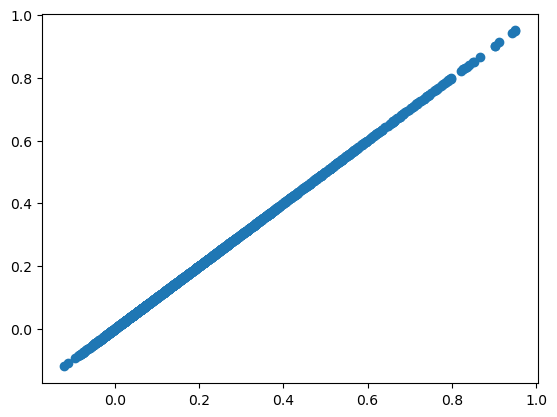

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

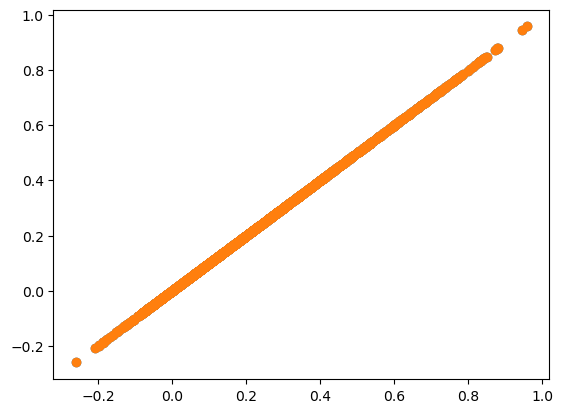

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

array([[148.9844259, 148.9844259, 148.9844259, ..., 148.9844259,
        148.9844259, 148.9844259],
       [148.9844259, 148.9844259, 148.9844259, ..., 148.9844259,
        148.9844259, 148.9844259],
       [148.9844259, 148.9844259, 148.9844259, ..., 148.9844259,
        148.9844259, 148.9844259],
       ...,
       [148.9844259, 148.9844259, 148.9844259, ..., 148.9844259,
        148.9844259, 148.9844259],
       [148.9844259, 148.9844259, 148.9844259, ..., 148.9844259,
        148.9844259, 148.9844259],
       [148.9844259, 148.9844259, 148.9844259, ..., 148.9844259,
        148.9844259, 148.9844259]])

In [9]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

norm


In [10]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([-0.19204526, -0.17637901, -0.07645335, -0.2073121 , -0.00187986,
        -0.00773106, -0.1816081 , -0.06734939, -0.16156674, -0.08812812,
        -0.09310812, -0.21691326, -0.19659737, -0.2734923 , -0.17349955,
        -0.0957486 , -0.08469349, -0.16639657, -0.18817202, -0.03191231,
        -0.04547747, -0.24926709, -0.20226221, -0.09242213, -0.18410265,
        -0.20870666, -0.22346374, -0.24555859, -0.05548027, -0.20968165,
        -0.16647432, -0.17279087, -0.12657015, -0.20534066, -0.14050381,
        -0.16389032, -0.03332479, -0.094494  , -0.00469978, -0.10448128]),
 array([0.00538486, 0.00538486, 0.00538486, 0.00538486, 0.00538486,
        0.00538486, 0.00538486, 0.00538486, 0.00538486, 0.00538486,
        0.00538486, 0.00538486, 0.00538486, 0.00538486, 0.00538486,
        0.00538486, 0.00538486, 0.00538486, 0.00538486, 0.00538486,
        0.00538486, 0.00538486, 0.00538486, 0.00538486, 0.00538486,
        0.00538486, 0.00538486, 0.00538486, 0.00538486, 0.00538486,
      

In [19]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\utils.py:9: RuntimeWarning: invalid value encountered in sqrt
  sigmaamax = 2*np.sqrt(np.max(betahat**2 - sebetahat**2))


ValueError: cannot convert float NaN to integer

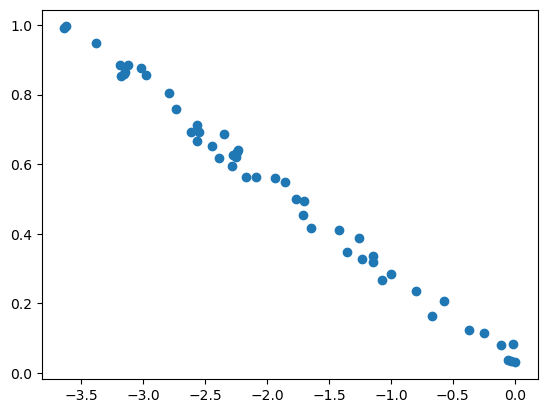

In [12]:
plt.scatter(mycebmf.L[:,0], u)

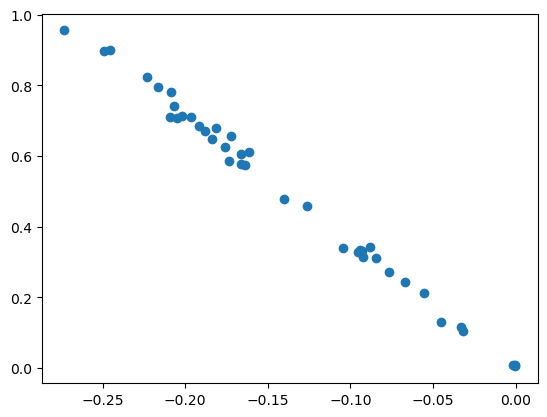

In [13]:
plt.scatter(mycebmf.F[:,0], v)

In [14]:
mycebmf.L[:,1]

array([-0.03879954, -0.00189265, -0.00527518, -0.03463279, -0.04330333,
        0.00663487, -0.10132153, -0.00085049,  0.01792345, -0.00211302,
       -0.00696206, -0.42174215, -0.09480742, -0.11396518,  0.00293235,
        0.01131298,  0.00486731, -0.21670453, -0.17738176,  0.00739728,
        0.20779087,  0.08911702,  0.24508838, -0.26860033, -0.32917027,
        0.0136644 ,  0.02054138,  0.02126896,  0.17785146,  0.09241013,
        0.01294861, -0.09055693,  0.00069801,  0.02287889, -0.22354759,
        0.04857927,  0.01081025,  0.00878397,  0.05981034,  0.13183007,
       -0.00130168,  0.17719163, -0.02374711,  0.29595332,  0.38413841,
        0.0064137 , -0.00402393,  0.05835846, -0.06575641,  0.13348539])

In [15]:
for i in range(10):
    mycebmf.iter()

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\utils.py:9: RuntimeWarning: invalid value encountered in sqrt
  sigmaamax = 2*np.sqrt(np.max(betahat**2 - sebetahat**2))


ValueError: cannot convert float NaN to integer

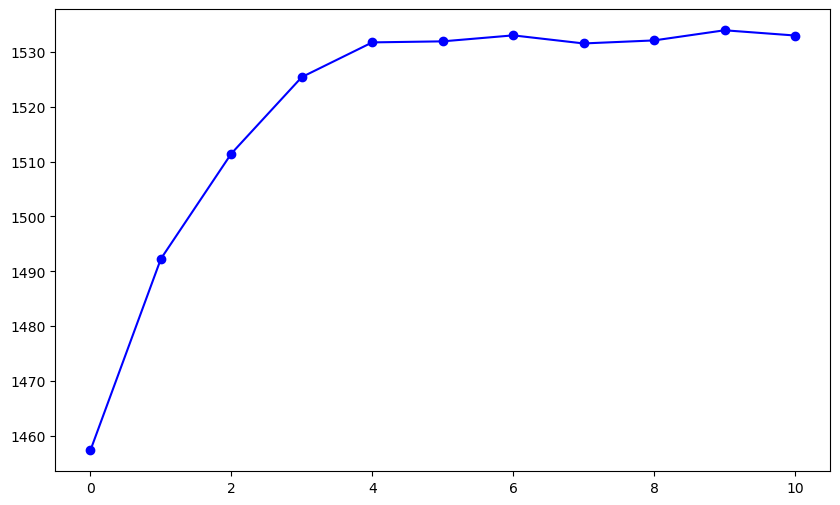

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')